import nessary libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import interpolation as inter
from contour_sort import *
from fix_image_orientation import *
from crop_image import *
from paper_extraction import *
from commonfunctions import *

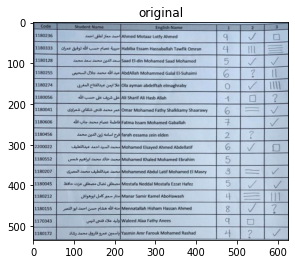

In [2]:
img = cv2.imread('../../Walid/warpedImgs/4.jpg')
show_images([img], ['original'])

img_original = img.copy()

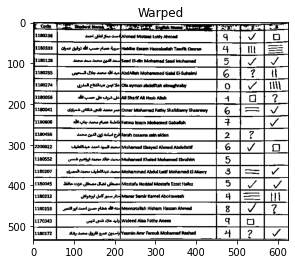

True

In [3]:
img_output = cv2.cvtColor(img_original,cv2.COLOR_BGR2GRAY)
img_output= cv2.adaptiveThreshold(img_output, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
            cv2.THRESH_BINARY, 51, 4)
show_images([img_output], ['Warped'])
cv2.imwrite('./Warped.jpg',img_output)

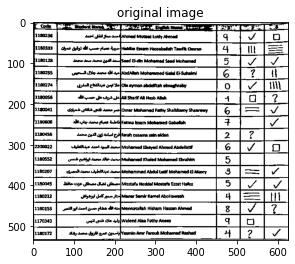

In [4]:
# img =paper.astype("uint8")
img= img_output.copy()
show_images([img],['original image'])

In [5]:
# # Image modification
# gray =img
# img_original = img.copy()
# gray = cv2.bilateralFilter(gray, 20, 30, 30)

# # grad_x = cv2.Sobel(gray, -1, 1, 0)
# # # Gradient-Y

# # grad_y = cv2.Sobel(gray, -1, 0, 1)


# # abs_grad_x = cv2.convertScaleAbs(grad_x)
# # abs_grad_y = cv2.convertScaleAbs(grad_y)


# # grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

# edged = cv2.Canny(gray, 20, 120)
# edged = cv2.dilate(edged.copy(), None, 1)
# show_images([img, gray, edged], ['original', 'gray','edged'])
# contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
# for c in contours:
#     cv2.drawContours(img, [c], -1, (0, 255, 0), 3) #######################################
# biggest = biggest_contour(contours)
# points = biggest.reshape(4, 2)
# input_points = np.zeros((4, 2), dtype="float32")

# #Biggest Contour Points
# points_sum = points.sum(axis=1)

# top_left = points[np.argmin(points_sum)]
# bottom_right = points[np.argmax(points_sum)]

# points_diff = np.diff(points, axis=1)
# top_right = points[np.argmin(points_diff)]
# bottom_left = points[np.argmax(points_diff)]
# #Image Dimensions
# bottom_width = np.sqrt(pow((bottom_right[0] - bottom_left[0]), 2) + (pow((bottom_right[1] - bottom_left[1]), 2)))
# top_width = np.sqrt(pow((top_right[0] - top_left[0]), 2) + (pow((top_right[1] - top_left[1]), 2)))
# right_height = np.sqrt(pow((top_right[0] - bottom_right[0]), 2) + (pow((top_right[1] - bottom_right[1]), 2)))
# left_height = np.sqrt(pow((top_left[0] - bottom_left[0]), 2) + (pow((top_left[1] - bottom_left[1]), 2)))

# # Output image size
# width = max(int(bottom_width), int(top_width))
# height = max(int(right_height), int(left_height))
# print(width)
# print(height)
# # Points with new Coordinates 
# converted_points = np.float32([[0, 0], [width, 0], [0, height], [width, height]])
# #Image Dimensions
# bottom_width = np.sqrt(pow((bottom_right[0] - bottom_left[0]), 2) + (pow((bottom_right[1] - bottom_left[1]), 2)))
# top_width = np.sqrt(pow((top_right[0] - top_left[0]), 2) + (pow((top_right[1] - top_left[1]), 2)))
# right_height = np.sqrt(pow((top_right[0] - bottom_right[0]), 2) + (pow((top_right[1] - bottom_right[1]), 2)))
# left_height = np.sqrt(pow((top_left[0] - bottom_left[0]), 2) + (pow((top_left[1] - bottom_left[1]), 2)))
# # Output image size
# width = max(int(bottom_width), int(top_width))
# height = max(int(right_height), int(left_height))
# print(width)
# print(height)
# # Points with new Coordinates 
# converted_points = np.float32([[0, 0], [width, 0], [0, height], [width, height]])
# # Warping
# arr = np.float32([top_left, top_right, bottom_left, bottom_right])
# matrix = cv2.getPerspectiveTransform(arr, converted_points)
# img_output = cv2.warpPerspective(img_original, matrix, (width, height))
# show_images([img_original, gray, edged, img], ['original','gray','edged','contours'])

# show_images([img_output], ['Warped'])

# img_output= cv2.adaptiveThreshold(img_output, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
#             cv2.THRESH_BINARY, 51, 12)
# show_images([img_output], ['Warped'])
# cv2.imwrite('./Warped.jpg',img_output)

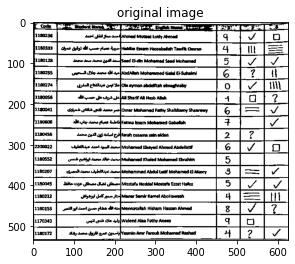

In [6]:
img= img_output.copy()
show_images([img],['original image'])
# Thresholding the image
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

(thresh, img_bin) = cv2.threshold(img, 128, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)

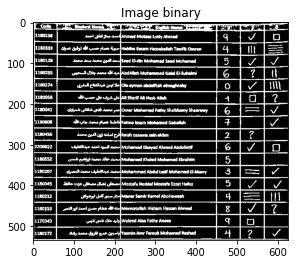

True

In [7]:
# Invert the image
img_bin = 255-img_bin 
show_images([img_bin],['Image binary'])
cv2.imwrite("./2.png", img_bin)
# sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
# img_bin = cv2.filter2D(img_bin, -1, sharpen_kernel)

In [8]:
# Defining a kernel length

kernel_length = np.array(img).shape[1]//38
 
# A verticle kernel of (1 X kernel_length), which will detect all the verticle lines from the image.
verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))

# A horizontal kernel of (kernel_length X 1), which will help to detect all the horizontal line from the image.
hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))

# A kernel of (3 X 3) ones.
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

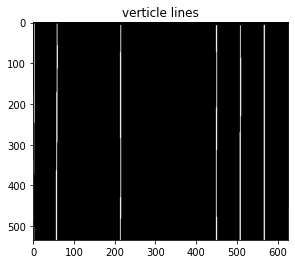

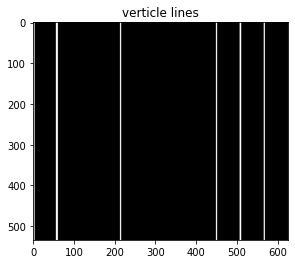

Number of horizontal lines: 7


In [9]:
# Morphological operation to detect vertical lines from an image
img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=3)
verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=3)
show_images([verticle_lines_img],['verticle lines'])
contours, hierarchy = cv2.findContours(verticle_lines_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

lines = cv2.HoughLinesP(verticle_lines_img,1,np.pi/180,40,minLineLength=10,maxLineGap=20)
i = 0
for line  in lines:
    for x1, y1, x2, y2 in line:
        i+=1
        verticle_lines_img=cv2.line(verticle_lines_img,(x1,0),(x2,verticle_lines_img.shape[0]),(255,255,255),1)
show_images([verticle_lines_img],['verticle lines'])
contours, hierarchy = cv2.findContours(verticle_lines_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
num_ver=len(contours)
print('Number of horizontal lines:', num_ver)

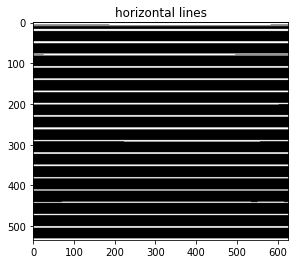

Number of horizontal lines: 20


In [10]:
#Morphological operation to detect horizontal lines from an image
img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=4)
horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=3)

    
lines = cv2.HoughLinesP(horizontal_lines_img,2,np.pi/180,40,minLineLength=5,maxLineGap=10)
i = 0
for line  in lines:
    for x1, y1, x2, y2 in line:
        i+=1
        horizontal_lines_img=cv2.line(horizontal_lines_img,(0,y1),(horizontal_lines_img.shape[1],y2),(255,255,255),1)
        
show_images([horizontal_lines_img],['horizontal lines'])
contours, hierarchy = cv2.findContours(horizontal_lines_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
num_hor= len(contours)
print('Number of horizontal lines:', num_hor)

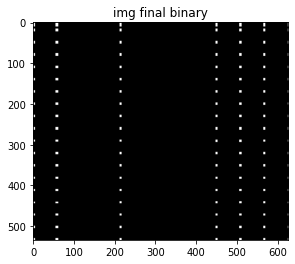

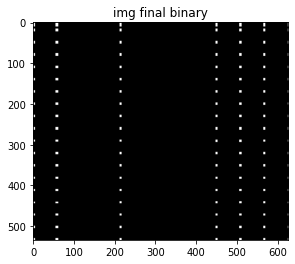

In [14]:
# Weighting parameters, this will decide the quantity of an image to be added to make a new image.
alpha = 0.5
beta = 1.0 - alpha

# This function helps to add two image with specific weight parameter to get a third image as summation of two image.
# img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.5)
img_final_bin=cv2.bitwise_and(verticle_lines_img, horizontal_lines_img)
img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=1)

(thresh, img_final_bin) = cv2.threshold(img_final_bin, 128,255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
# (thresh, img_final_bin) = cv2.threshold(img_final_bin, 0, 255,cv2.THRESH_BINARY)
show_images([img_final_bin],['img final binary'])
# kernal_two=np.ones((3,3))
#kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (4,8))
# img_final_bin = cv2.morphologyEx(img_final_bin, cv2.MORPH_CLOSE, kernel)
# img_final_bin=cv2.erode(img_final_bin,kernal_two,iterations=1)
# img_final_bin=cv2.dilate(img_final_bin,kernal_two,iterations=4)
#img_final_bin=cv2.erode(img_final_bin,kernal_two,iterations=1)


##img_final_bin=cv2.dilate(img_final_bin,kernal_two,iterations=5)
#img_final_bin=cv2.dilate(img_final_bin,kernal_two,iterations=3)
# cv2::Mat locations
# cv2.findNonZero(img_final_bin, locations);
# for i in locations:
#     print(i)


show_images([img_final_bin],['img final binary'])

In [15]:
contours,im2 = cv2.findContours(img_final_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted_counter(contours)
# boundingBoxes = [cv2.boundingRect(c) for c in contours]
# (cnts, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes), key=lambda b:b[1][0]))
coulmns=[]
rows=[]
for c in range(len(contours)-1):
    x1, y1, w1, h1 = cv2.boundingRect(contours[c])
    x2, y2, w2, h2 = cv2.boundingRect(contours[c+1])
    if(x1==x2):
        rows.append(y1)
    else:
        rows.append(y1)
        break
   
   
    

7 19 133


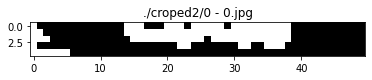

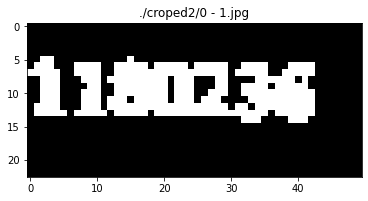

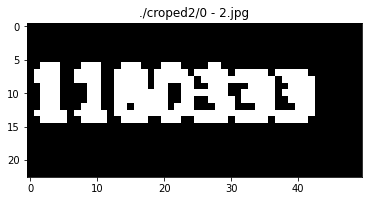

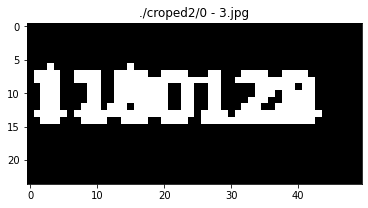

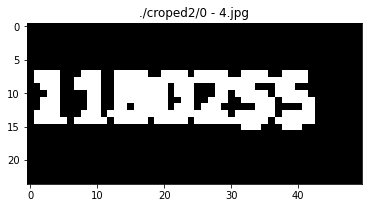

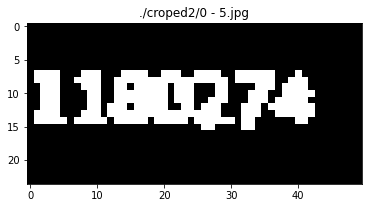

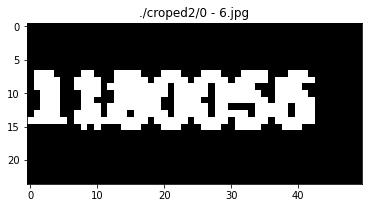

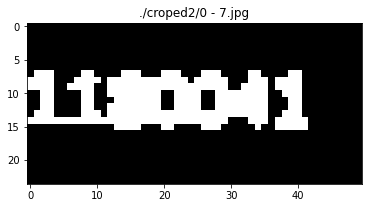

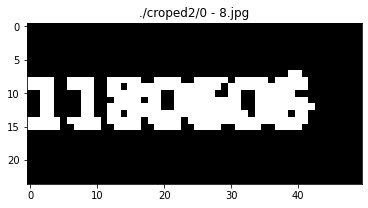

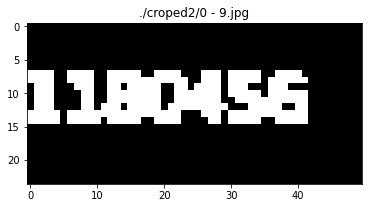

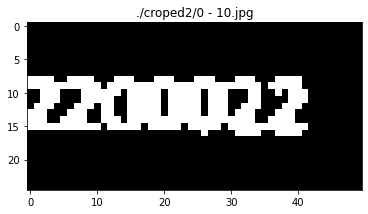

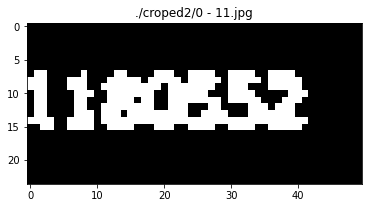

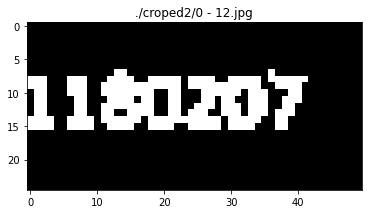

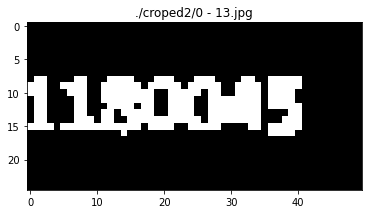

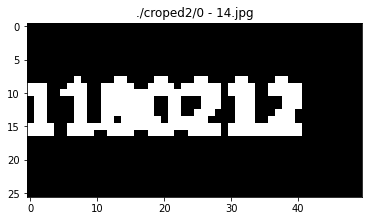

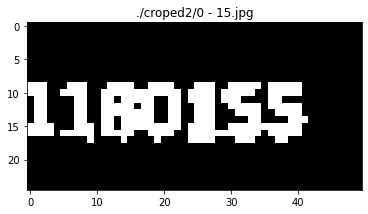

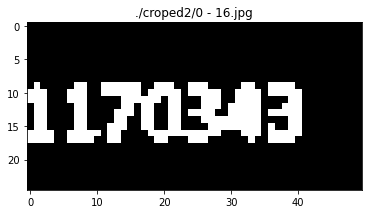

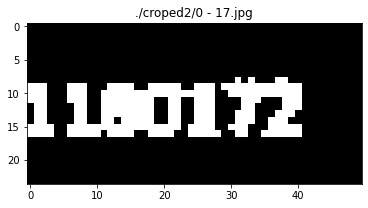

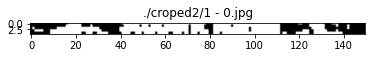

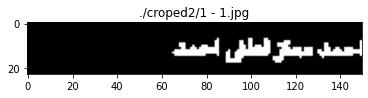

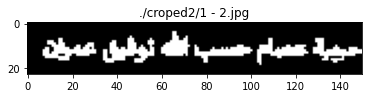

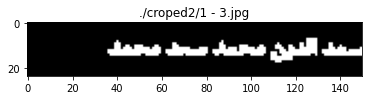

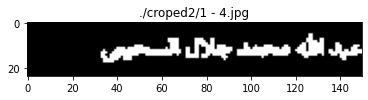

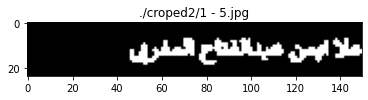

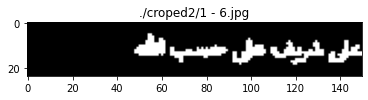

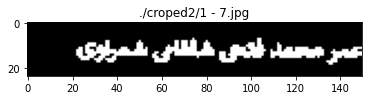

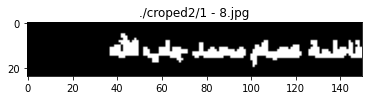

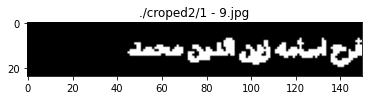

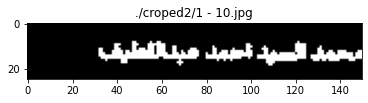

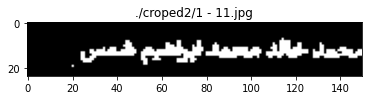

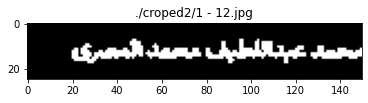

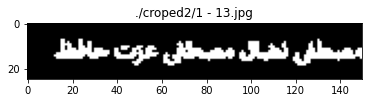

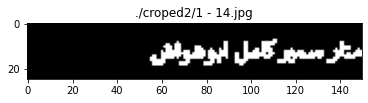

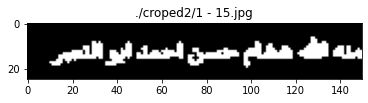

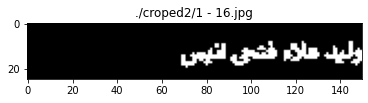

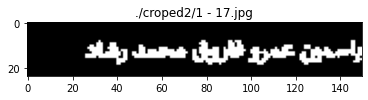

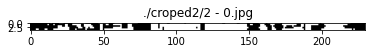

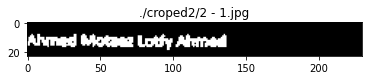

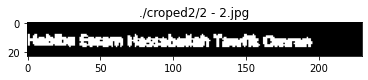

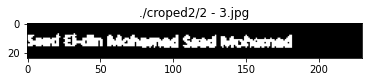

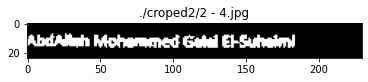

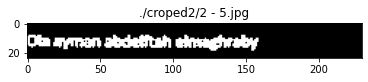

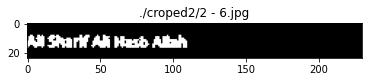

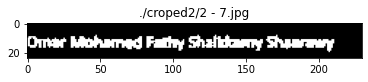

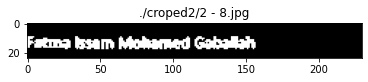

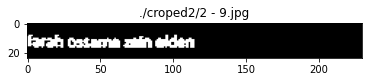

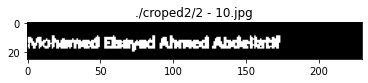

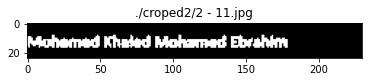

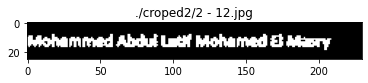

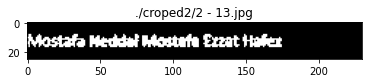

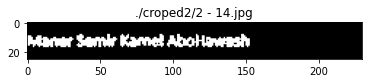

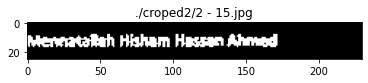

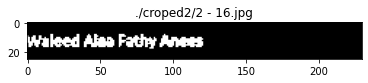

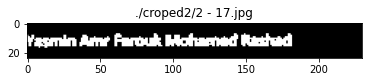

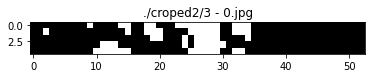

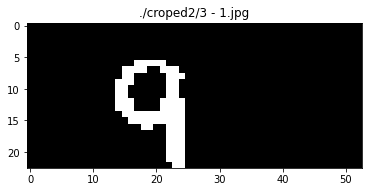

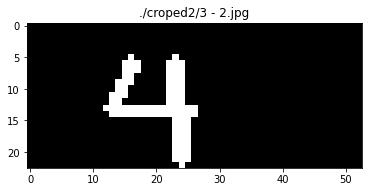

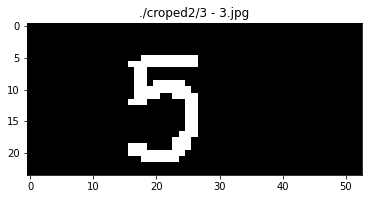

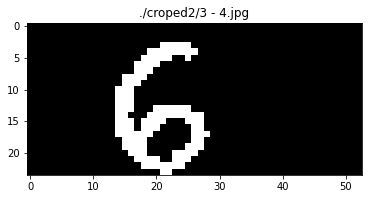

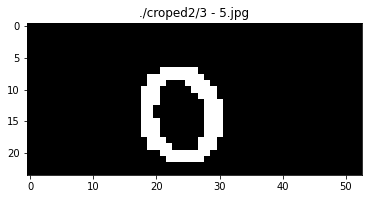

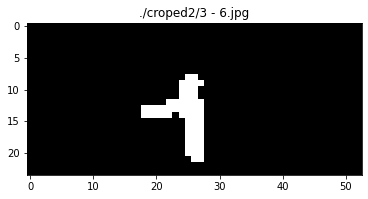

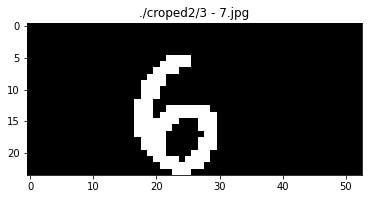

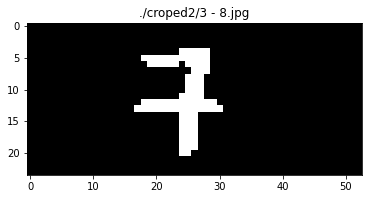

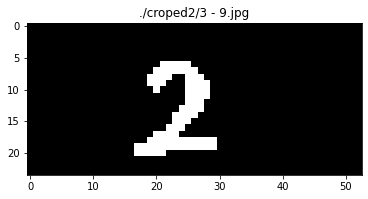

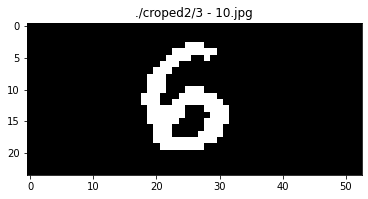

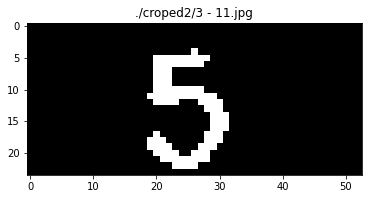

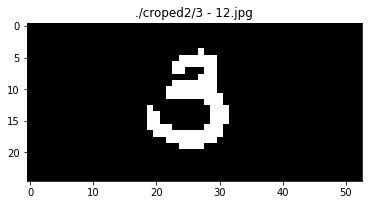

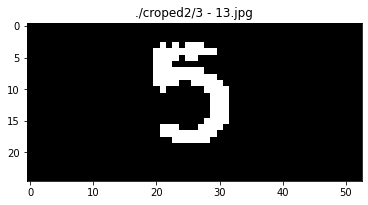

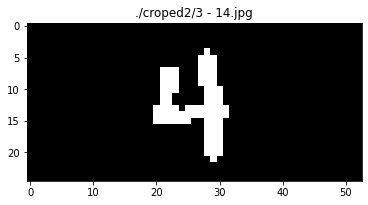

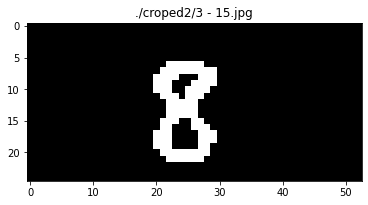

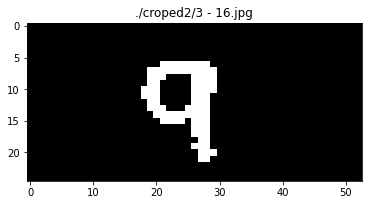

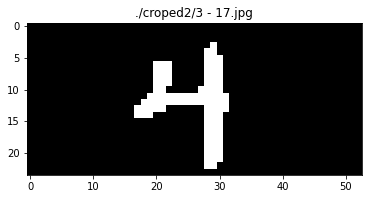

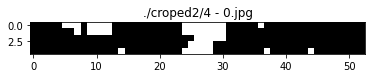

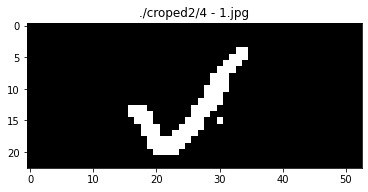

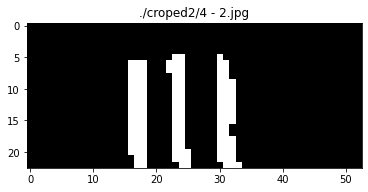

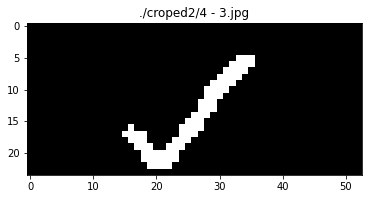

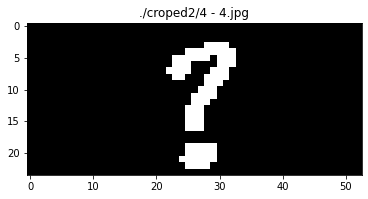

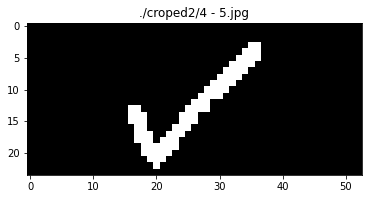

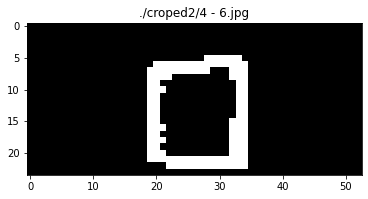

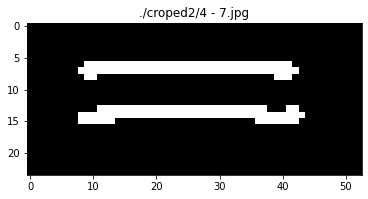

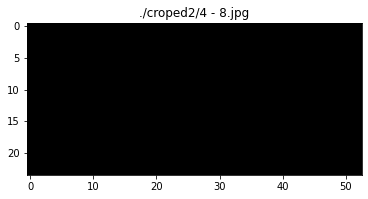

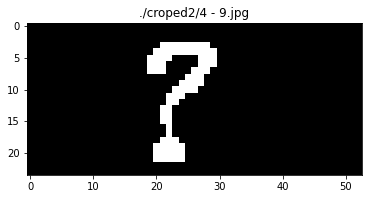

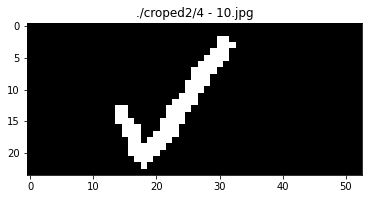

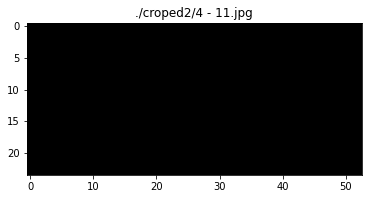

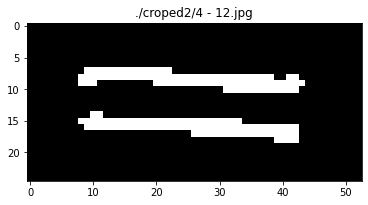

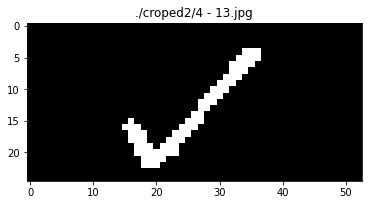

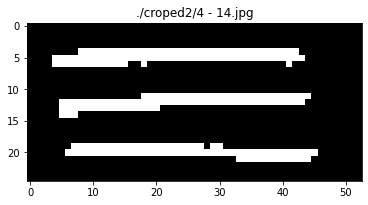

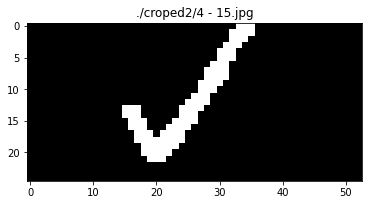

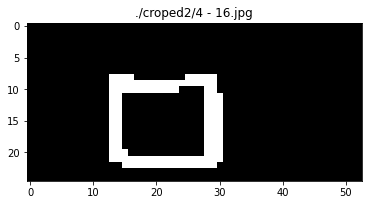

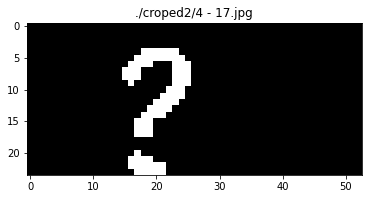

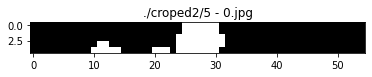

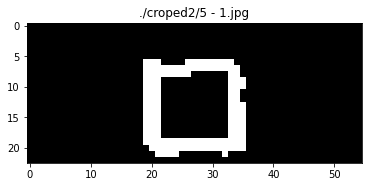

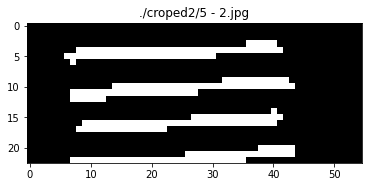

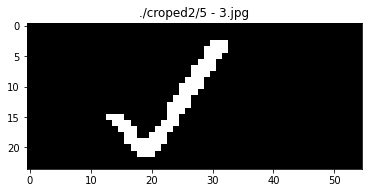

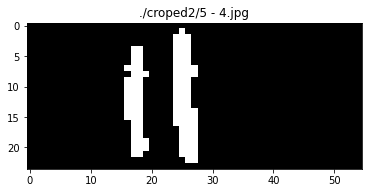

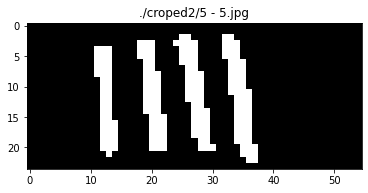

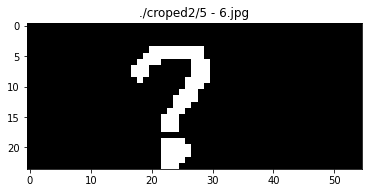

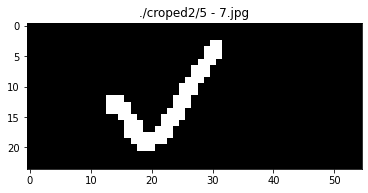

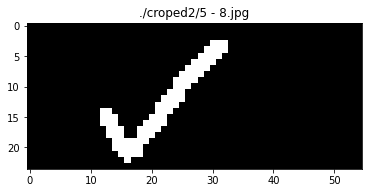

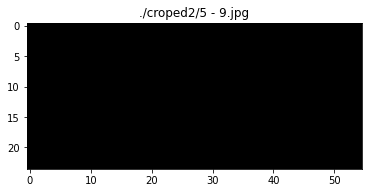

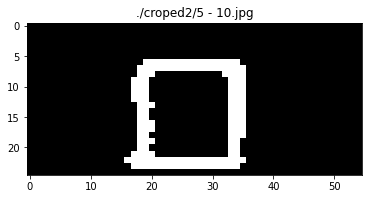

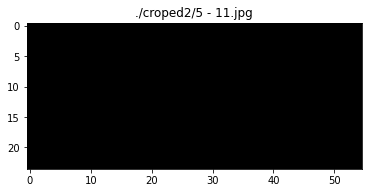

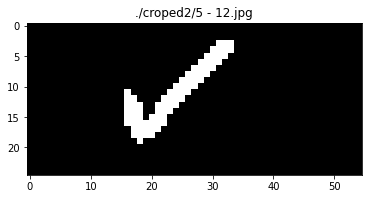

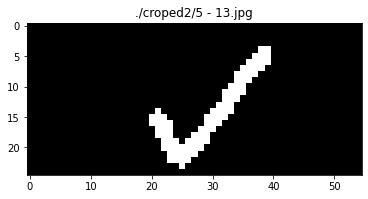

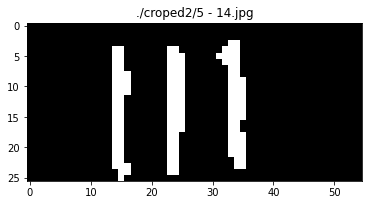

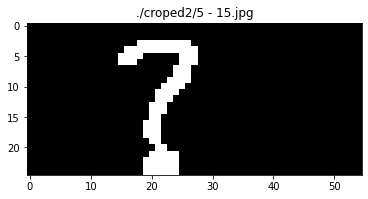

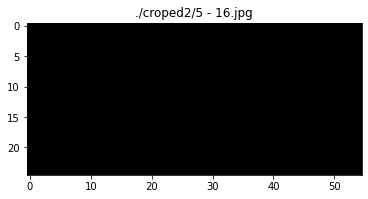

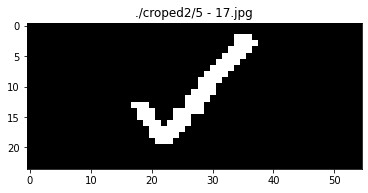

In [16]:

num_hor=len(rows)
num_ver=len(contours)//num_hor
print(num_ver,num_hor,len(contours))
for col in range(num_ver-1):
    for row in range(num_hor-1):
        # Returns the location and width,height for every contour
        x1, y1, w1, h1 = cv2.boundingRect(contours[row+num_hor*col])
        x2, y2, w2, h2 = cv2.boundingRect(contours[row+1+num_hor*col])
        x3, y3, w3, h3 = cv2.boundingRect(contours[row+num_hor*col+num_hor+1])
      
        #if (w>10 and h>0 and h <300 and w<1000 ):
       
        new_img = img[y1+h1:y3, x2+w2:x3]
       
        show_images([~new_img], ['./croped2/'+str(col)+' - '+str(row)+'.jpg'])
        cv2.imwrite('./croped2/'+str(col)+' - '+str(row)+'.jpg',new_img)
        